## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures

## Importing Dataset and visulize it

In [451]:
df = pd.read_csv('FINAL_CLEAN.csv')
df= df.loc[:,~df.columns.str.contains('^Unnamed: 0')]
df.head()

,year,tabaghat,parking,anbari,metrag,price,source,asansor,room,floor,lat,vahed,long,shomali,date
0,1396.0,4,0,0,40,38750000,iranfile,0,1,3.0,36.47018,4.0,52.60150,0.0,1401/09/10
1,1391.0,5,1,0,80,45625000,iranfile,1,2,3.0,31.17727,5.0,44.96124,0.0,1401/09/10
2,1387.0,4,0,1,62,25000000,iranfile,0,2,4.0,36.47018,4.0,52.60150,0.0,1401/09/10
3,1381.0,2,0,0,43,32558000,iranfile,0,1,1.0,36.95833,2.0,53.25000,1.0,1401/09/10
4,1400.0,4,0,0,50,37400000,iranfile,1,1,3.0,36.47018,4.0,52.60150,0.0,1401/09/10


In [452]:
df=df.drop(['source','date'],axis=1)

In [453]:
df["price"] = df["price"].str.replace(',', '')

In [454]:
from unidecode import unidecode

In [455]:
df['price'] = pd.to_numeric(df.price.apply(unidecode), errors='coerce')

In [456]:
df['floor']= df['floor'].str.replace('کا', '30')

In [457]:
df['tabaghat']= df['tabaghat'].str.replace('---', '5')

In [458]:
df['price'] = df['price'].astype(float)
df['metrag'] = df['metrag'].astype(float)
df['room'] = df['room'].astype(float)
df['floor'] = df['floor'].astype(float)
df['tabaghat'] = df['tabaghat'].astype(float)

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20857 entries, 0 to 20856
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      20857 non-null  float64
 1   tabaghat  20857 non-null  float64
 2   parking   20857 non-null  int64  
 3   anbari    20857 non-null  int64  
 4   metrag    20857 non-null  float64
 5   price     16927 non-null  float64
 6   asansor   20857 non-null  int64  
 7   room      20857 non-null  float64
 8   floor     20857 non-null  float64
 9   lat       20857 non-null  float64
 10  vahed     20857 non-null  float64
 11  long      20857 non-null  float64
 12  shomali   20857 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 2.1 MB


In [460]:
df.isnull().sum()

year           0
tabaghat       0
parking        0
anbari         0
metrag         0
price       3930
asansor        0
room           0
floor          0
lat            0
vahed          0
long           0
shomali        0
dtype: int64

## change object type to numerical

In [461]:
df.head()

,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
0,1396.0,4.0,0,0,40.0,38750000.0,0,1.0,3.0,36.47018,4.0,52.60150,0.0
1,1391.0,5.0,1,0,80.0,45625000.0,1,2.0,3.0,31.17727,5.0,44.96124,0.0
2,1387.0,4.0,0,1,62.0,25000000.0,0,2.0,4.0,36.47018,4.0,52.60150,0.0
3,1381.0,2.0,0,0,43.0,32558000.0,0,1.0,1.0,36.95833,2.0,53.25000,1.0
4,1400.0,4.0,0,0,50.0,37400000.0,1,1.0,3.0,36.47018,4.0,52.60150,0.0


In [462]:
df.isnull().sum()

year           0
tabaghat       0
parking        0
anbari         0
metrag         0
price       3930
asansor        0
room           0
floor          0
lat            0
vahed          0
long           0
shomali        0
dtype: int64

## Taking care of missing data

In [463]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[['price']])
df[['price']]= imputer.transform(df[['price']])

In [464]:
df.to_csv('FINAL.csv')

In [465]:
df1=pd.read_csv('FINAL.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20857 entries, 0 to 20856
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20857 non-null  int64  
 1   year        20857 non-null  float64
 2   tabaghat    20857 non-null  float64
 3   parking     20857 non-null  int64  
 4   anbari      20857 non-null  int64  
 5   metrag      20857 non-null  float64
 6   price       20857 non-null  float64
 7   asansor     20857 non-null  int64  
 8   room        20857 non-null  float64
 9   floor       20857 non-null  float64
 10  lat         20857 non-null  float64
 11  vahed       20857 non-null  float64
 12  long        20857 non-null  float64
 13  shomali     20857 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.2 MB


In [433]:
df.isnull().sum()

year        0
tabaghat    0
parking     0
anbari      0
metrag      0
price       0
asansor     0
room        0
floor       0
lat         0
vahed       0
long        0
shomali     0
dtype: int64

In [434]:
df.describe()

,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,20857.000000,20857.000000,20857.000000,20857.000000,20857.00000,2.085700e+04,20857.000000,20857.000000,20857.000000,20857.000000,20857.000000,20857.000000,20857.000000
mean,1390.301577,5.377140,0.746943,0.726806,136.97502,8.731164e+07,0.669943,2.240830,3.413818,35.648342,4.033993,51.286681,0.350626
std,9.357119,3.446405,0.434773,0.445610,177.66997,8.971000e+07,0.470245,1.923066,3.075194,3.966228,2.350078,5.706037,0.477177
min,1360.000000,1.000000,0.000000,0.000000,-1.00000,1.600000e+06,0.000000,0.000000,-2.000000,7.087240,1.000000,-0.702022,0.000000
25%,1384.000000,4.000000,0.000000,0.000000,72.00000,5.000000e+07,0.000000,2.000000,2.000000,34.097660,3.000000,48.970490,0.000000
50%,1392.000000,5.000000,1.000000,1.000000,104.00000,6.666600e+07,1.000000,2.000000,3.000000,35.749100,4.000000,51.339154,0.000000
75%,1400.000000,5.000000,1.000000,1.000000,150.00000,9.000000e+07,1.000000,3.000000,4.000000,35.814820,5.000000,51.553880,1.000000
max,1401.000000,200.000000,1.000000,1.000000,11520.00000,4.000000e+09,1.000000,80.000000,31.000000,57.015630,36.000000,81.996090,1.000000


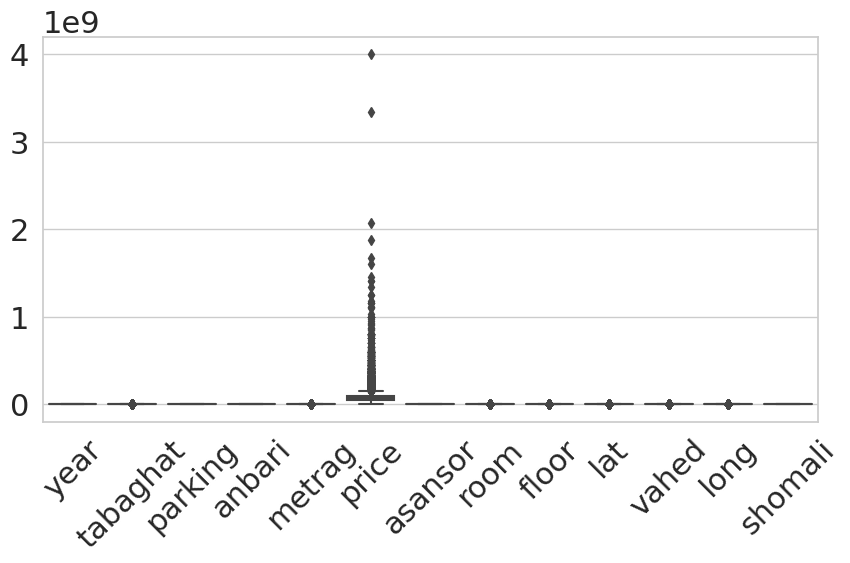

In [435]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df)
plt.show()

In [436]:
cols = ["price",'metrag','room','floor','tabaghat']
Q1=df.quantile(0.25)
Q3=df.quantile(0.60)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

/tmp/ipykernel_6399/2980247648.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_6399/2980247648.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,5946.000000,5946.000000,5946.000000,5946.000000,5946.000000,5.946000e+03,5946.000000,5946.0,5946.000000,5946.000000,5946.000000,5946.000000,5946.000000
mean,1388.878237,4.580222,0.792129,0.852506,90.364279,5.723101e+07,0.672217,2.0,2.494114,35.623318,3.902960,51.267177,0.359401
std,8.595653,0.675192,0.405818,0.354628,20.030863,1.570662e+07,0.469445,0.0,1.108746,3.947471,1.062631,5.665029,0.479865
min,1365.000000,3.000000,0.000000,0.000000,20.000000,2.400000e+07,0.000000,2.0,1.000000,15.541670,1.000000,22.395830,0.000000
25%,1383.000000,4.000000,1.000000,1.000000,75.000000,4.401175e+07,0.000000,2.0,2.000000,34.010475,4.000000,48.939820,0.000000
50%,1389.000000,5.000000,1.000000,1.000000,88.000000,5.980000e+07,1.000000,2.0,2.000000,35.725569,4.000000,51.302944,0.000000
75%,1396.000000,5.000000,1.000000,1.000000,105.000000,6.666600e+07,1.000000,2.0,3.000000,35.968750,4.000000,51.770830,1.000000
max,1401.000000,6.000000,1.000000,1.000000,186.000000,9.350000e+07,1.000000,2.0,4.000000,57.015630,8.000000,81.996090,1.000000


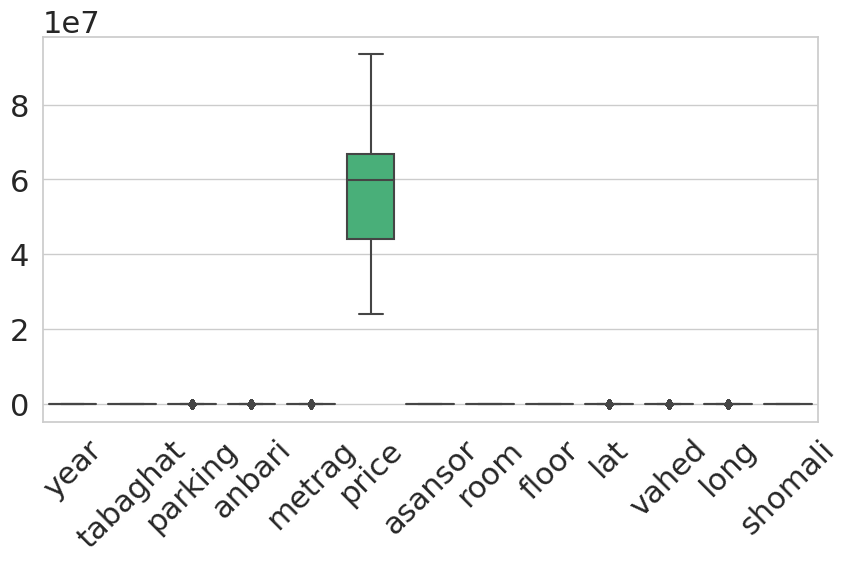

In [437]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df)
plt.show()

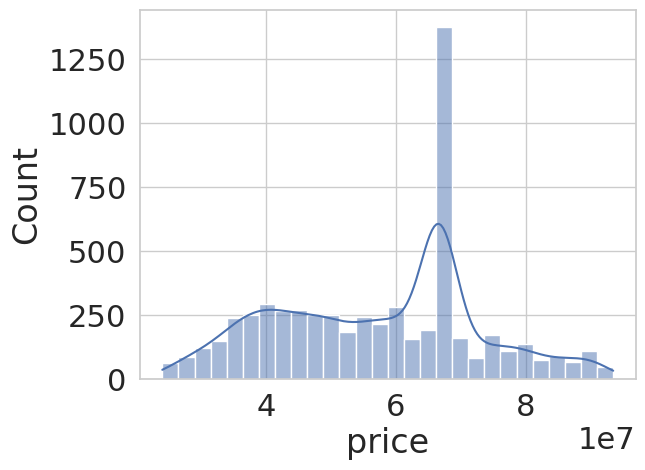

In [438]:
sns.histplot(df["price"], kde=True)
plt.show()

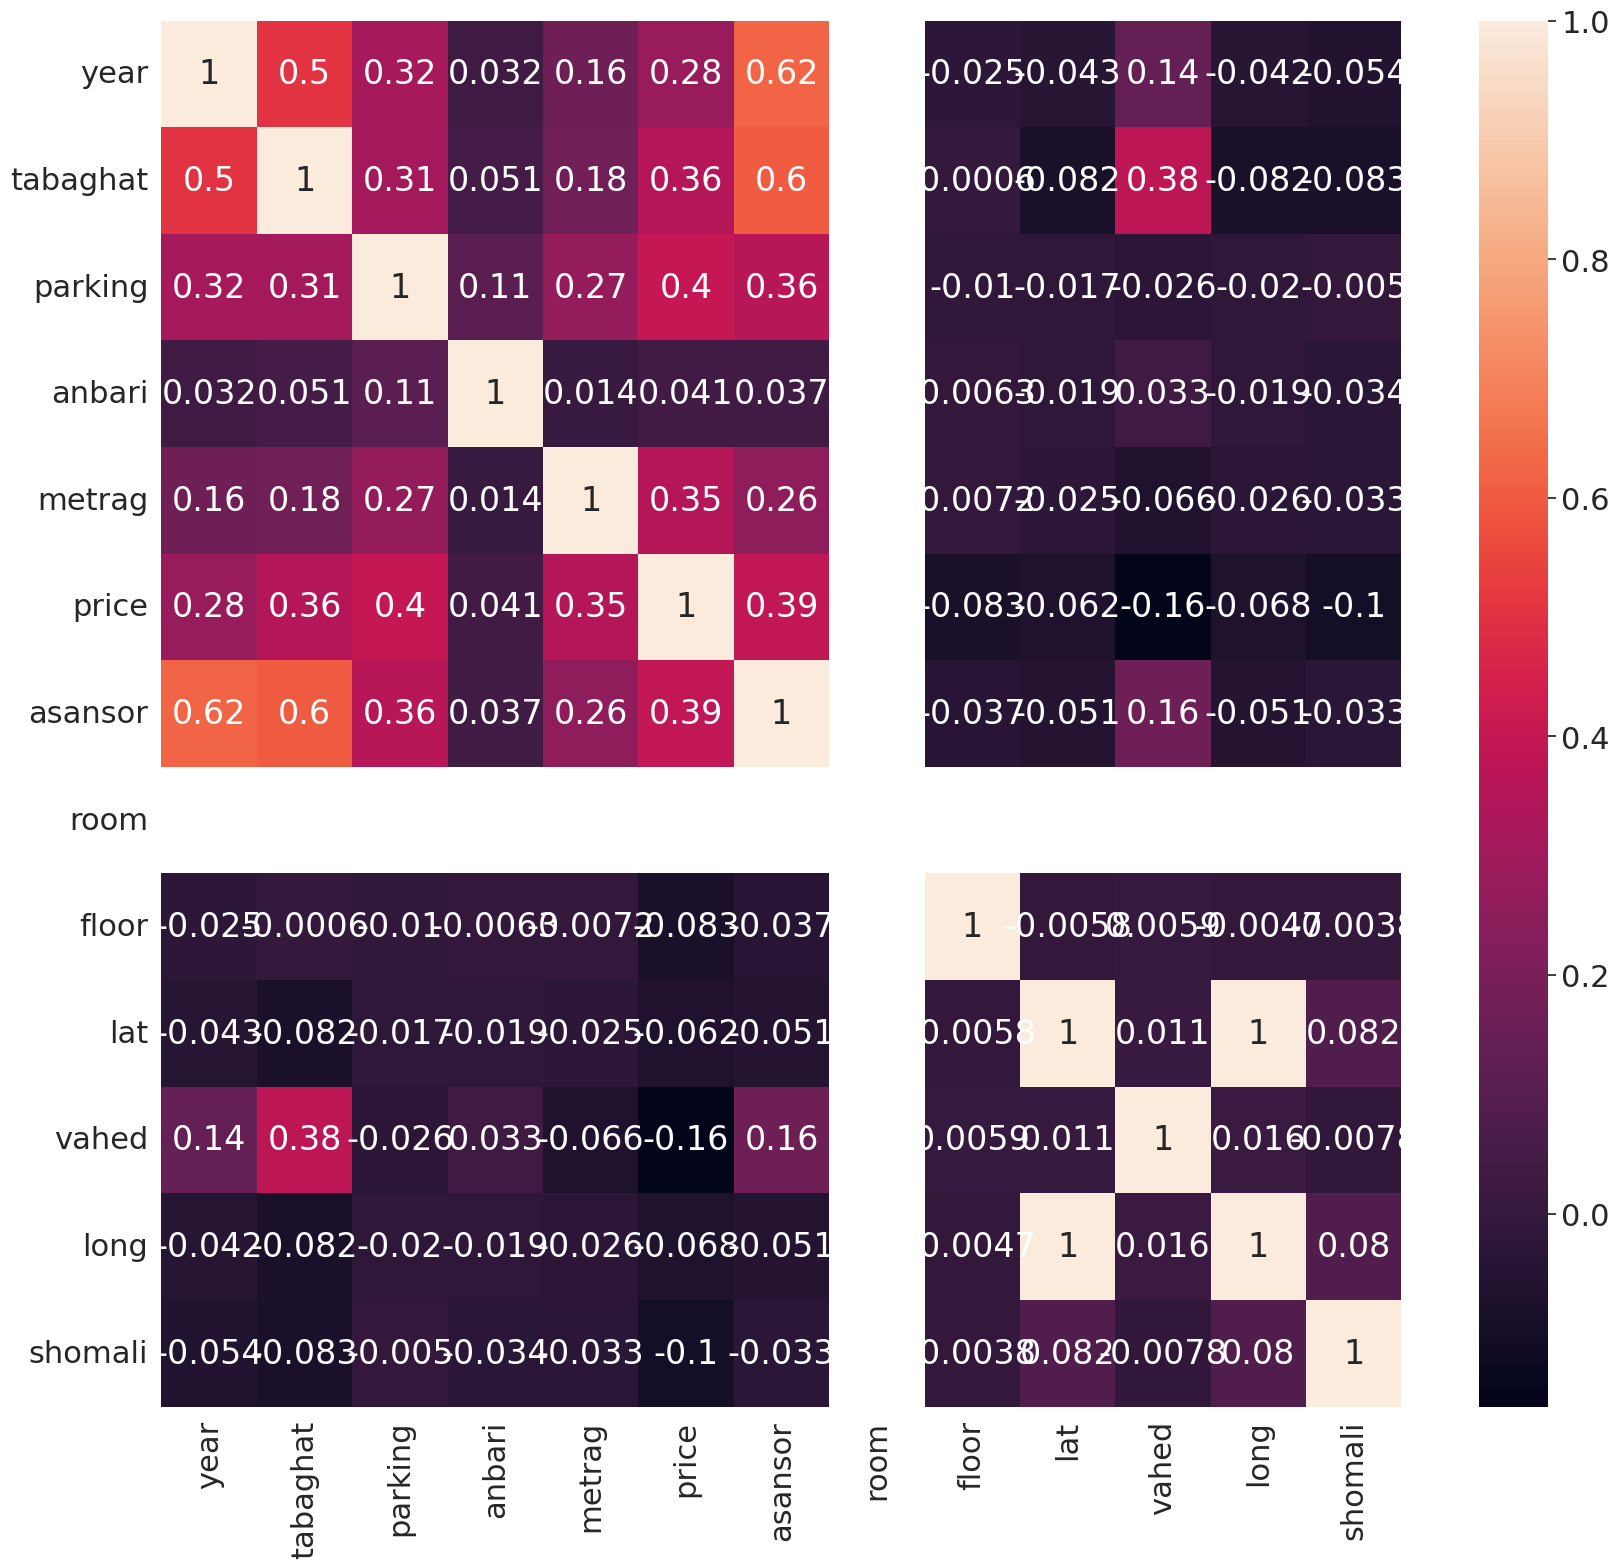

In [439]:
corr_date = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_date,annot=True)
plt.show()

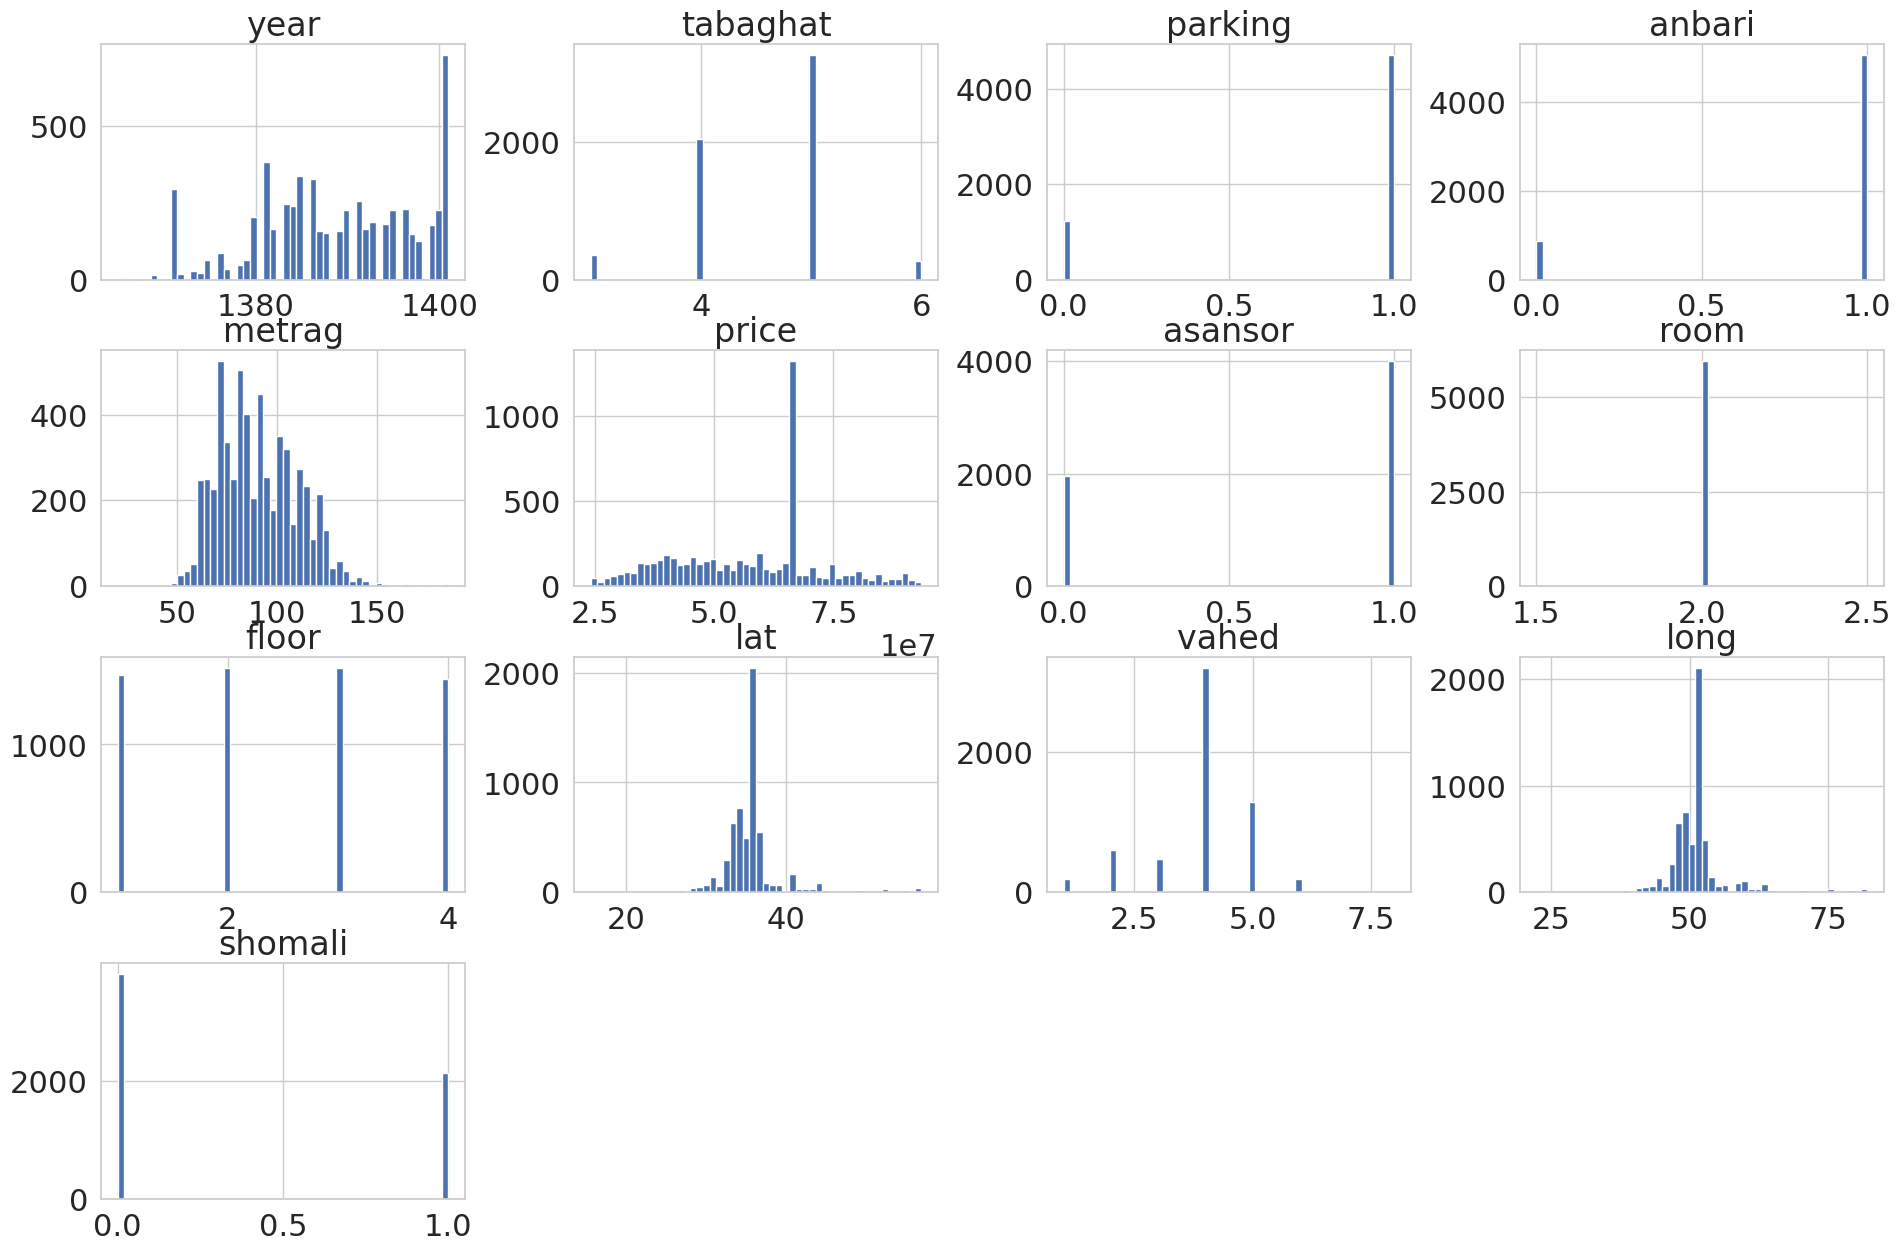

In [440]:
df.hist(bins=50, figsize=(23,15))
plt.show()

In [261]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

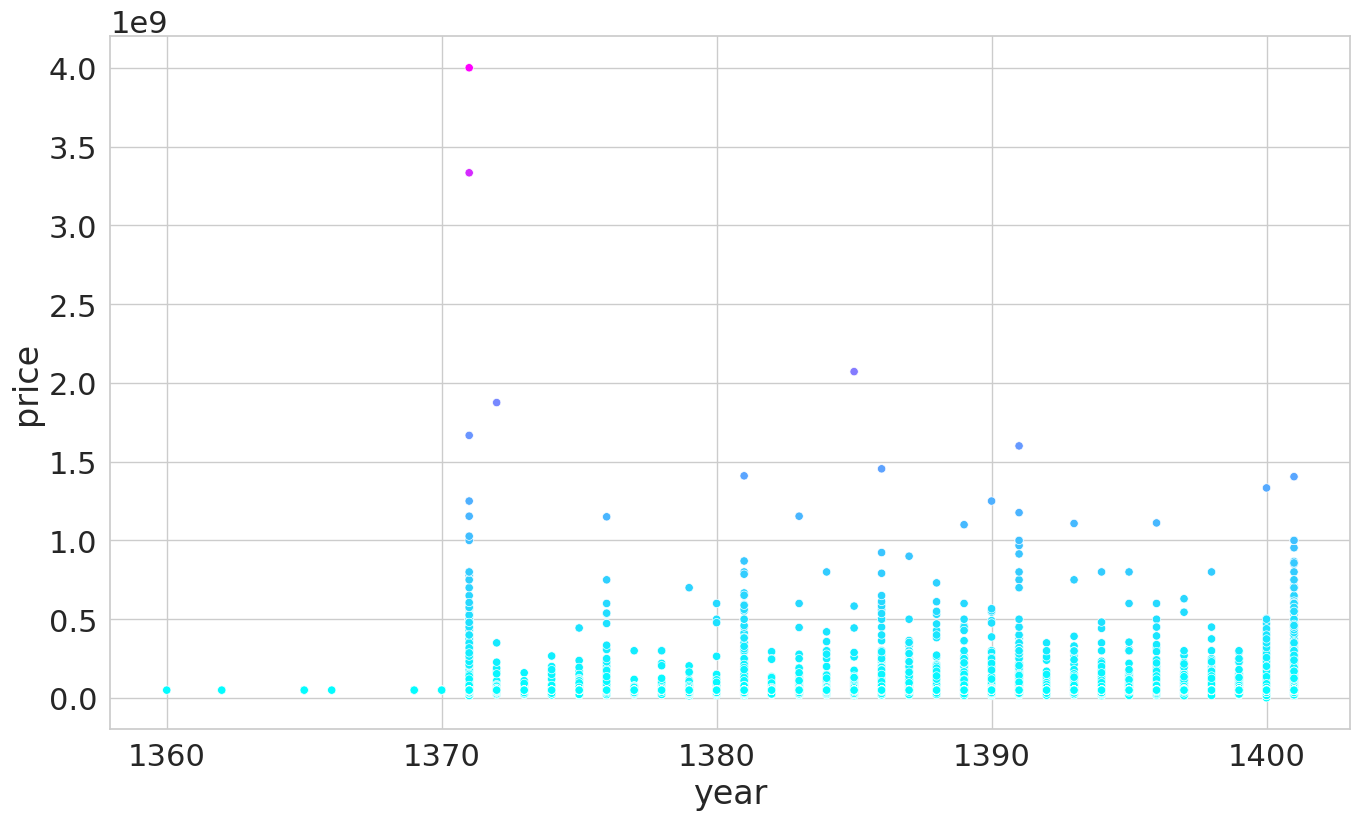

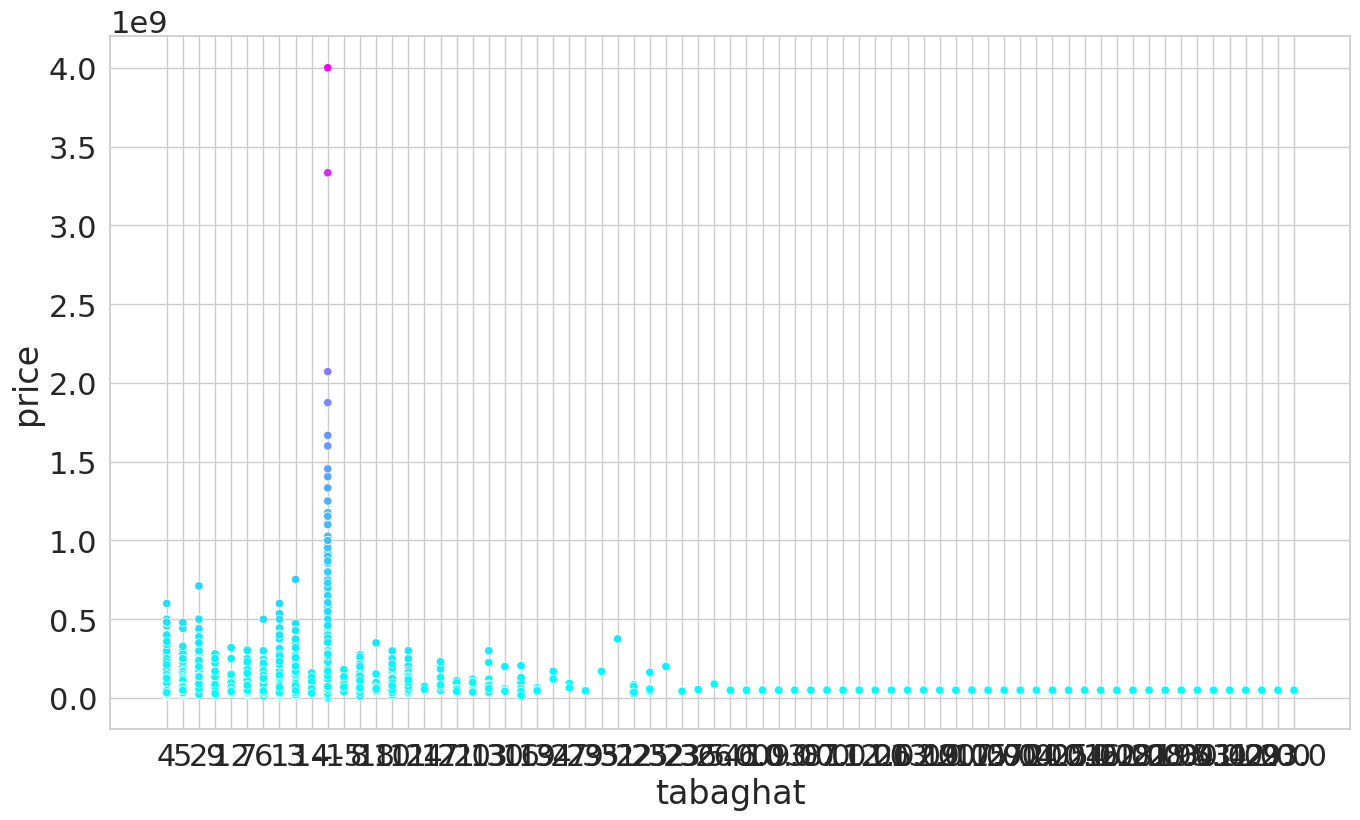

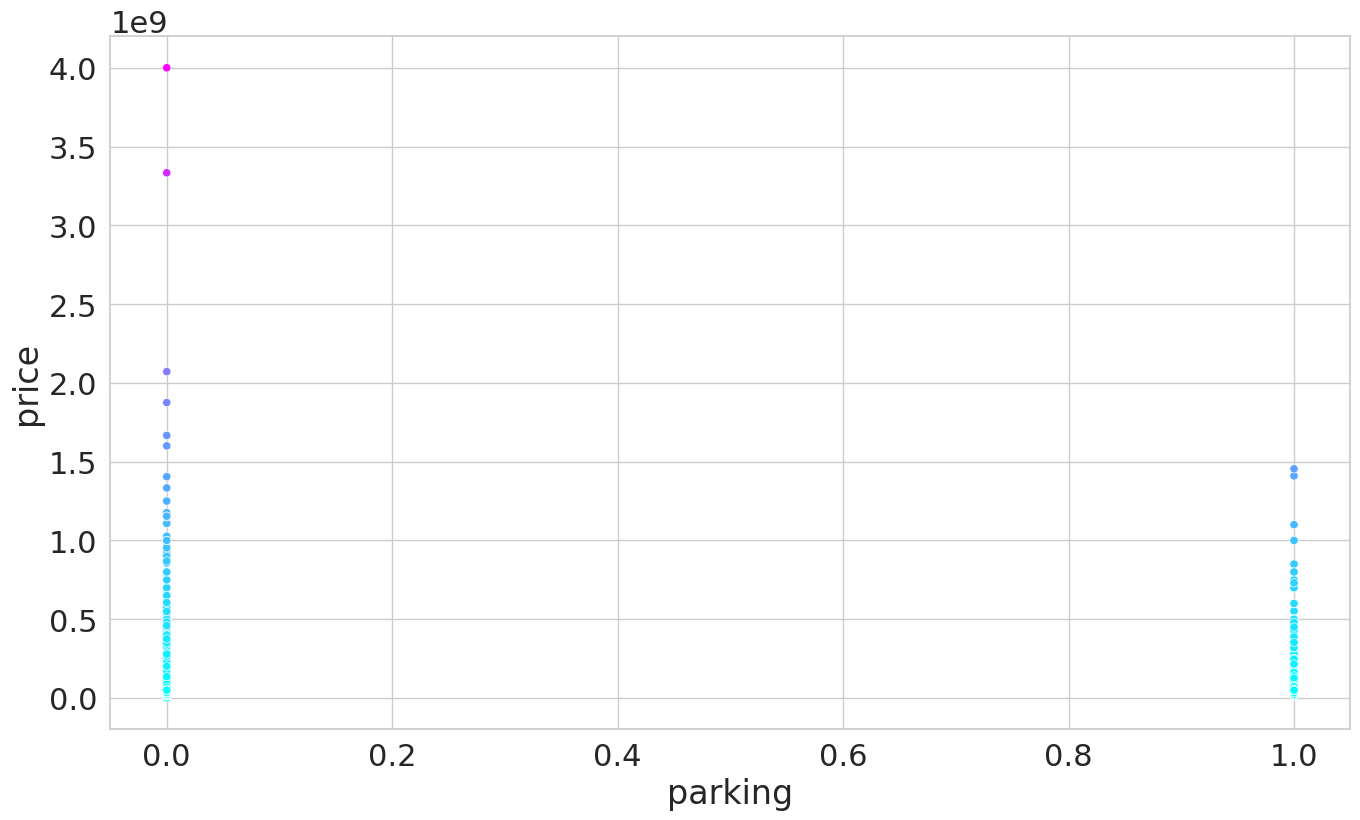

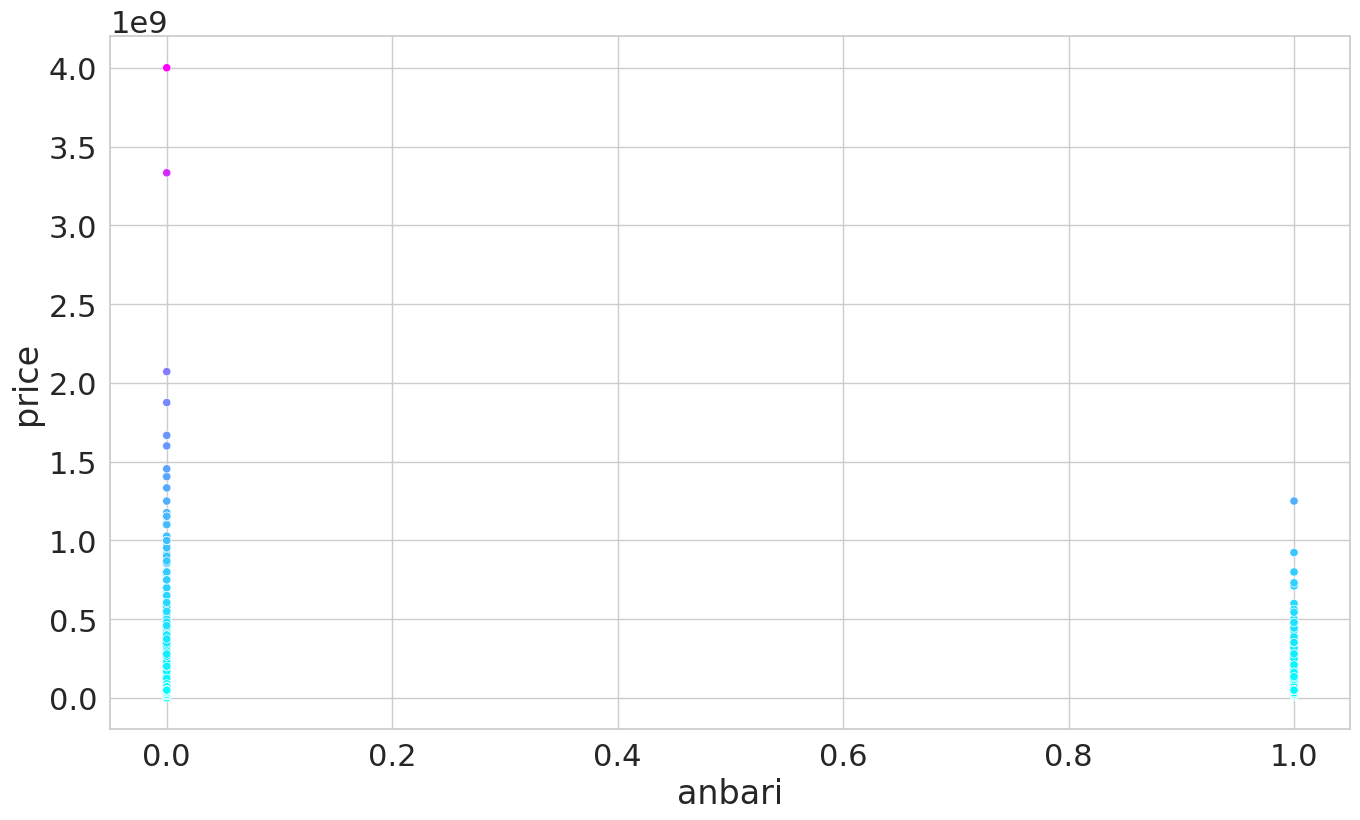

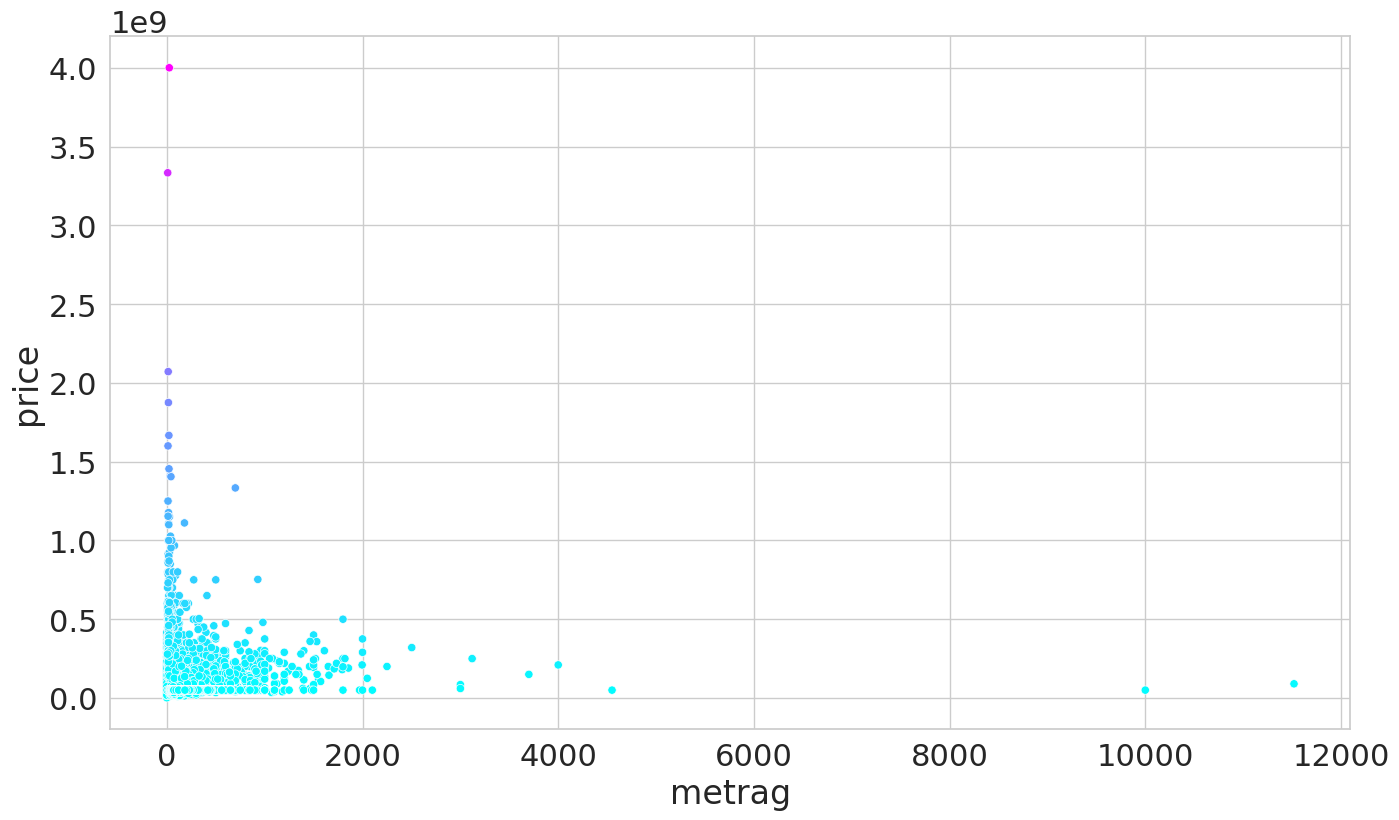

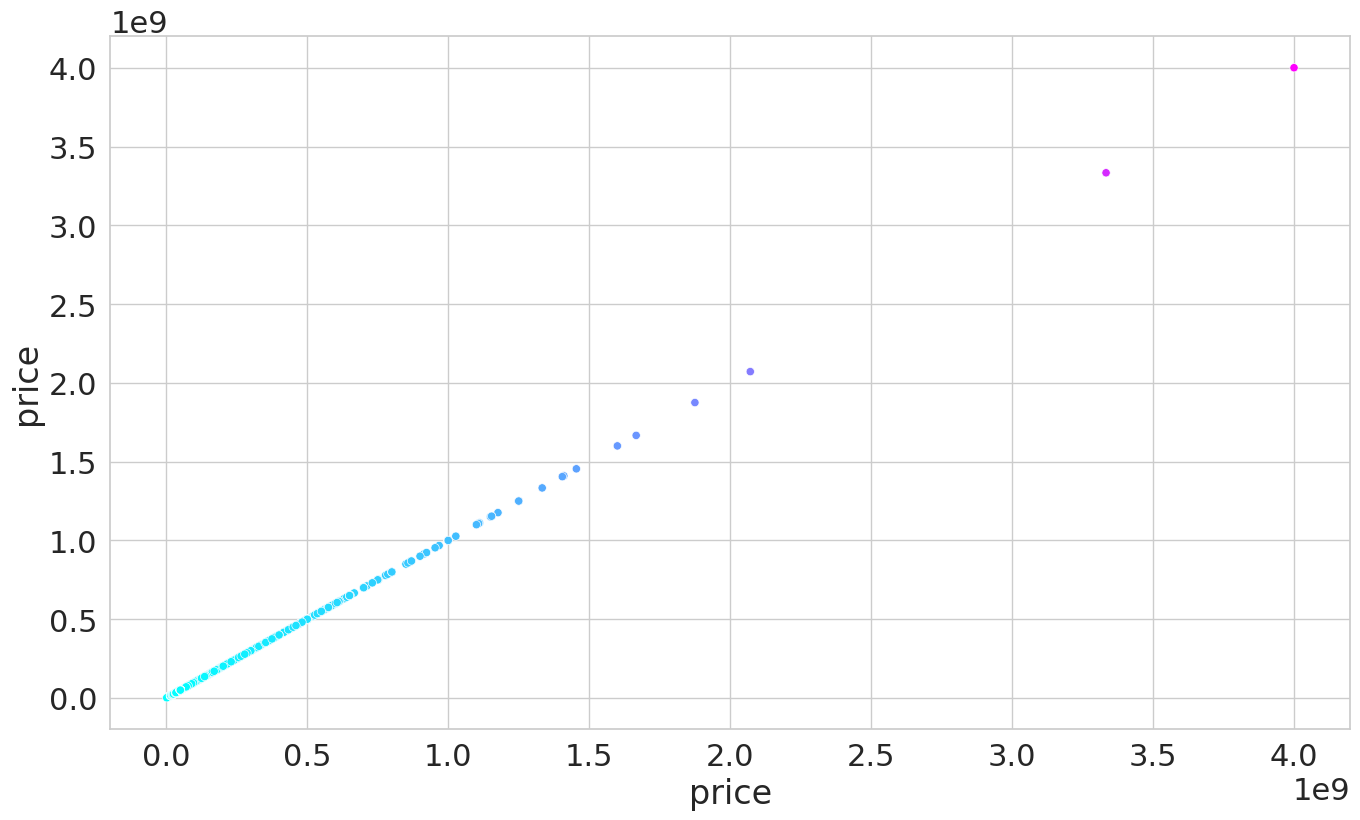

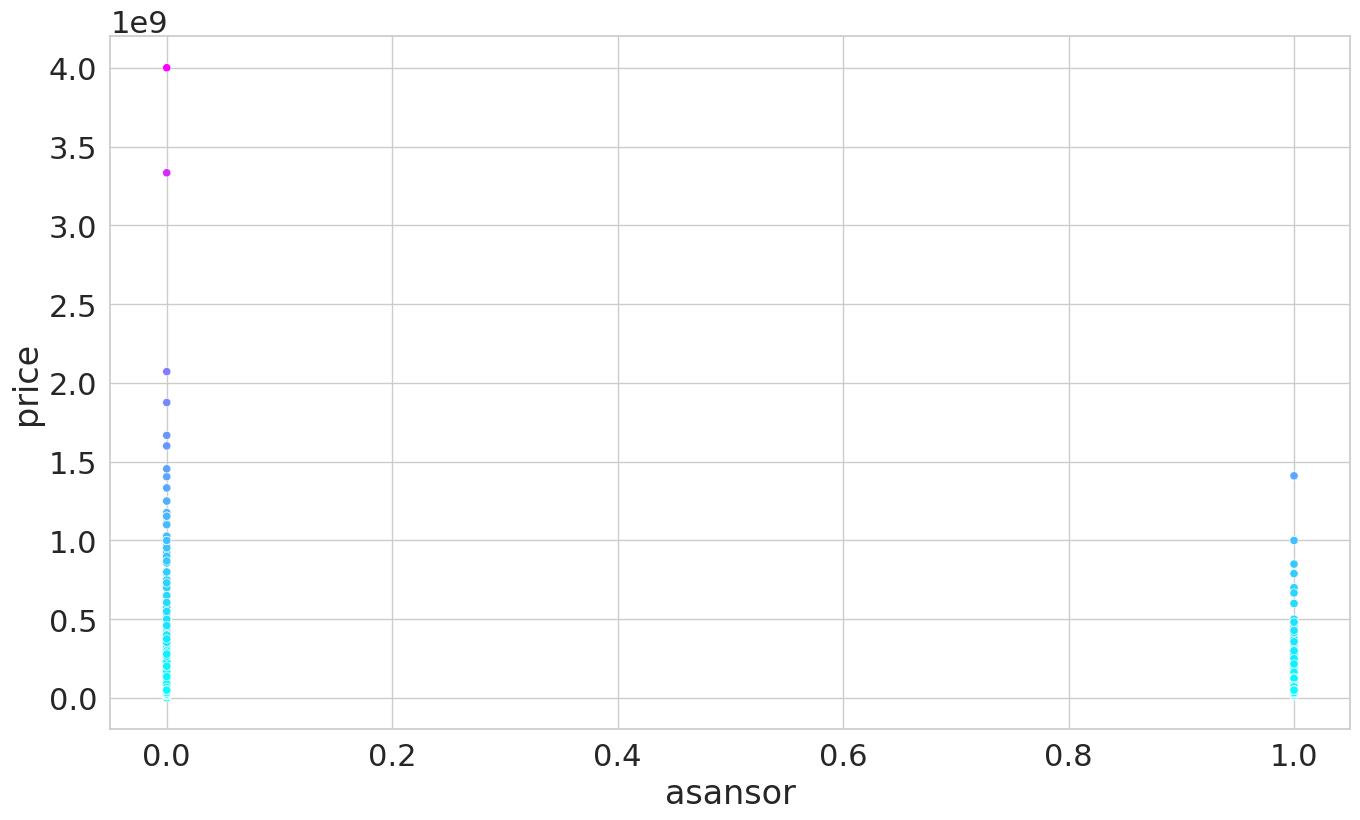

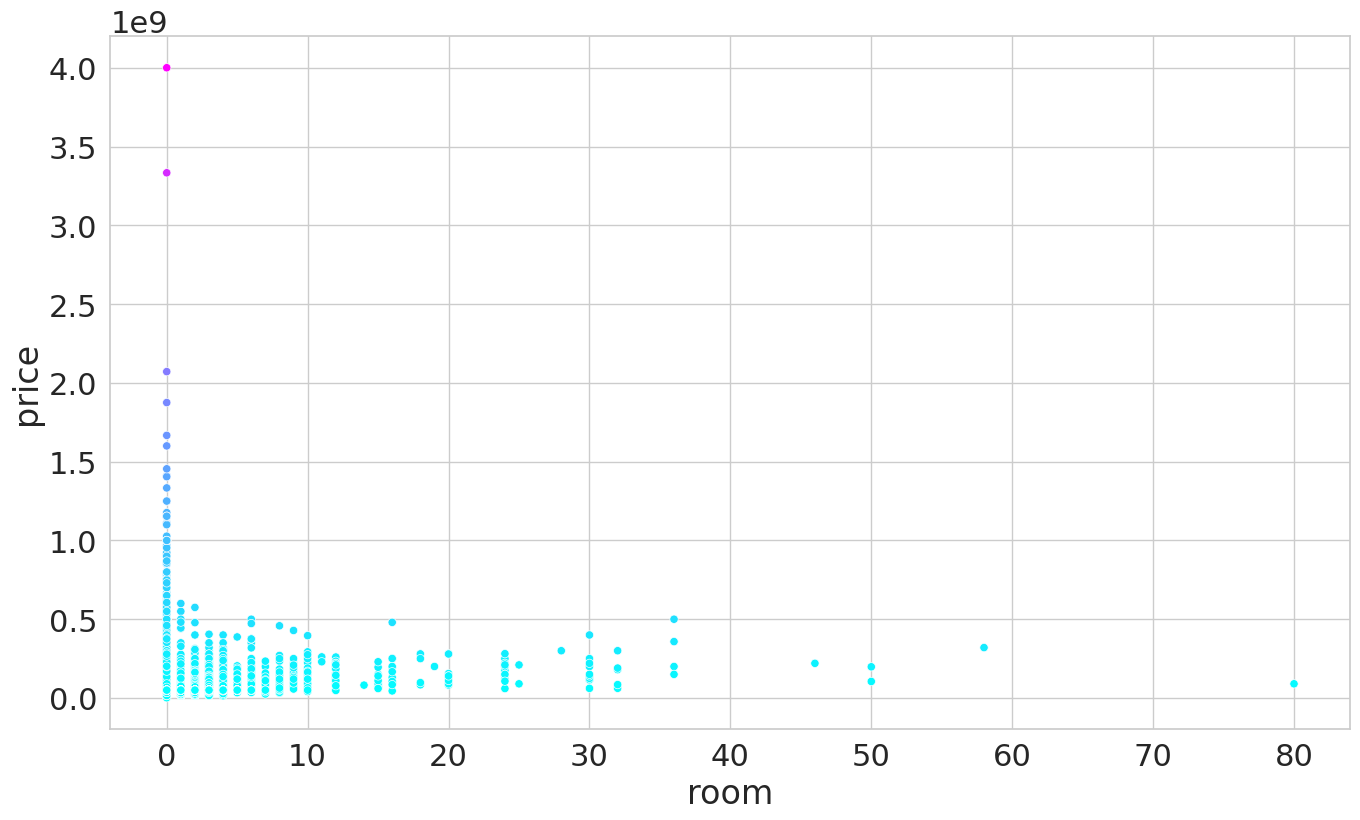

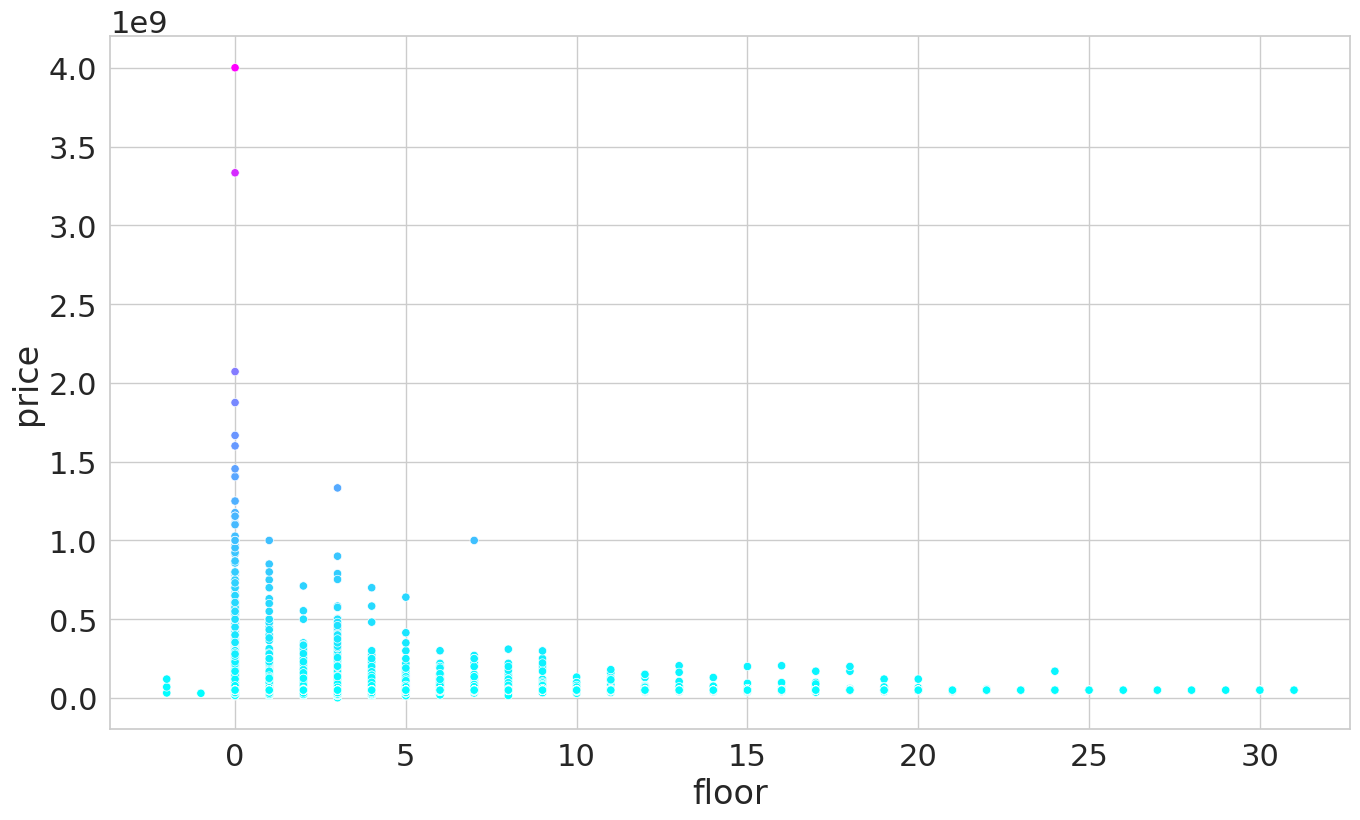

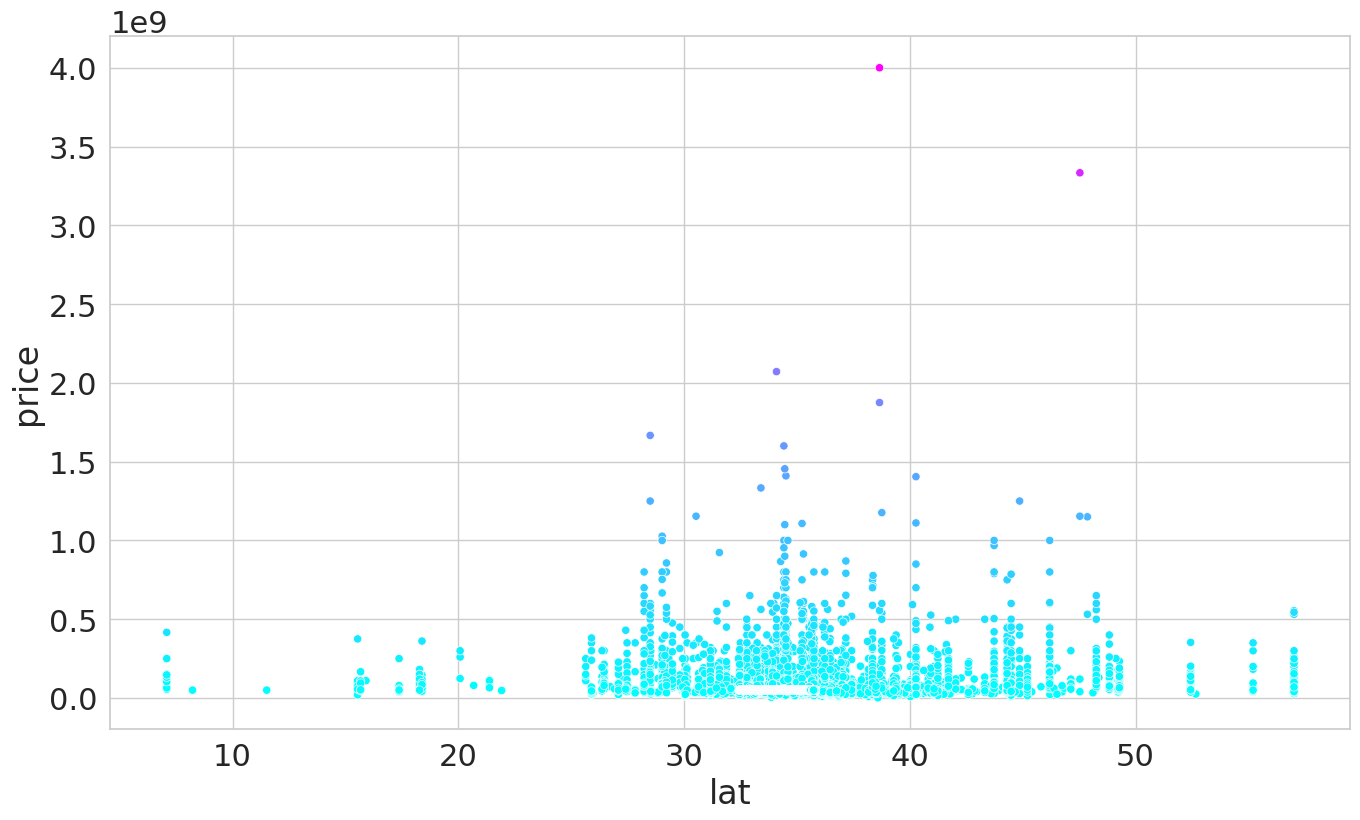

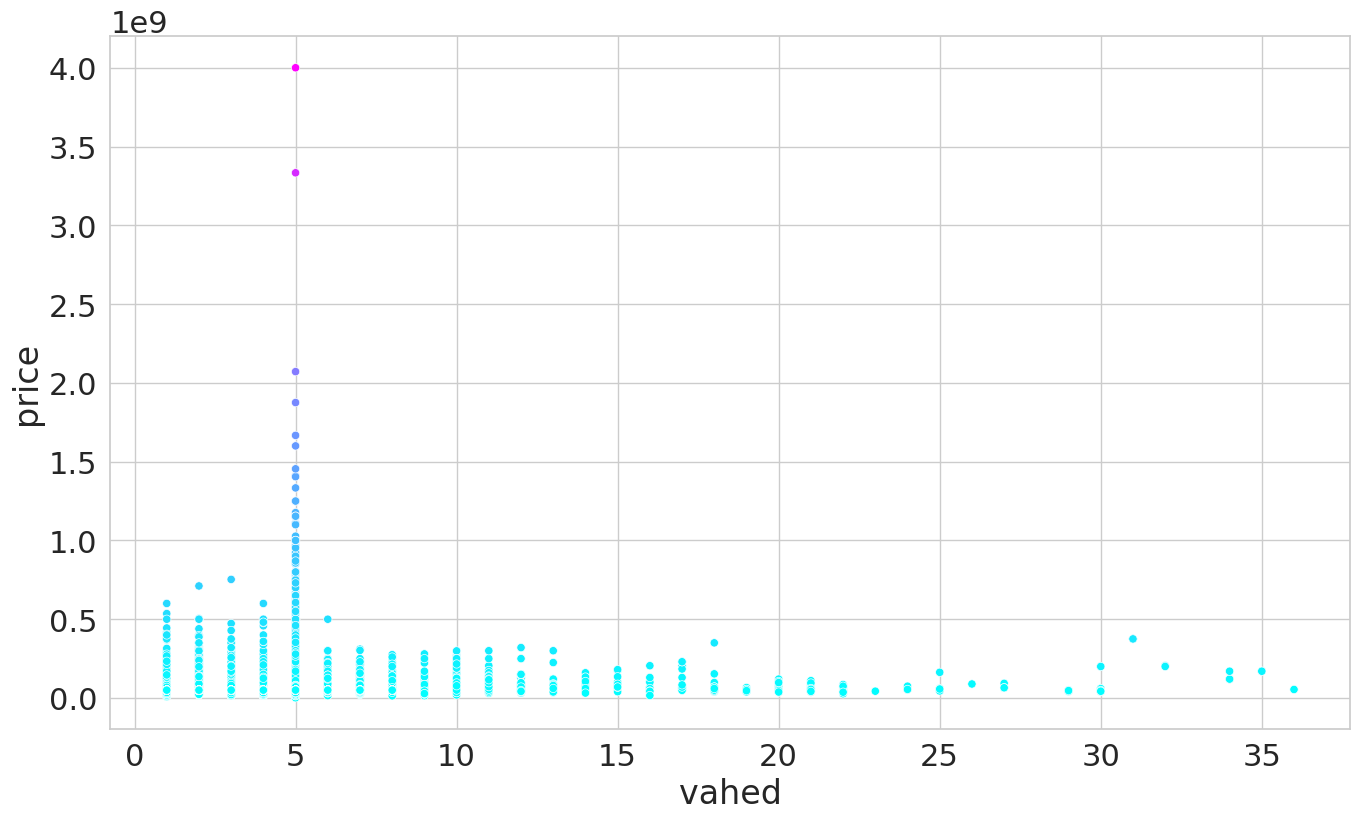

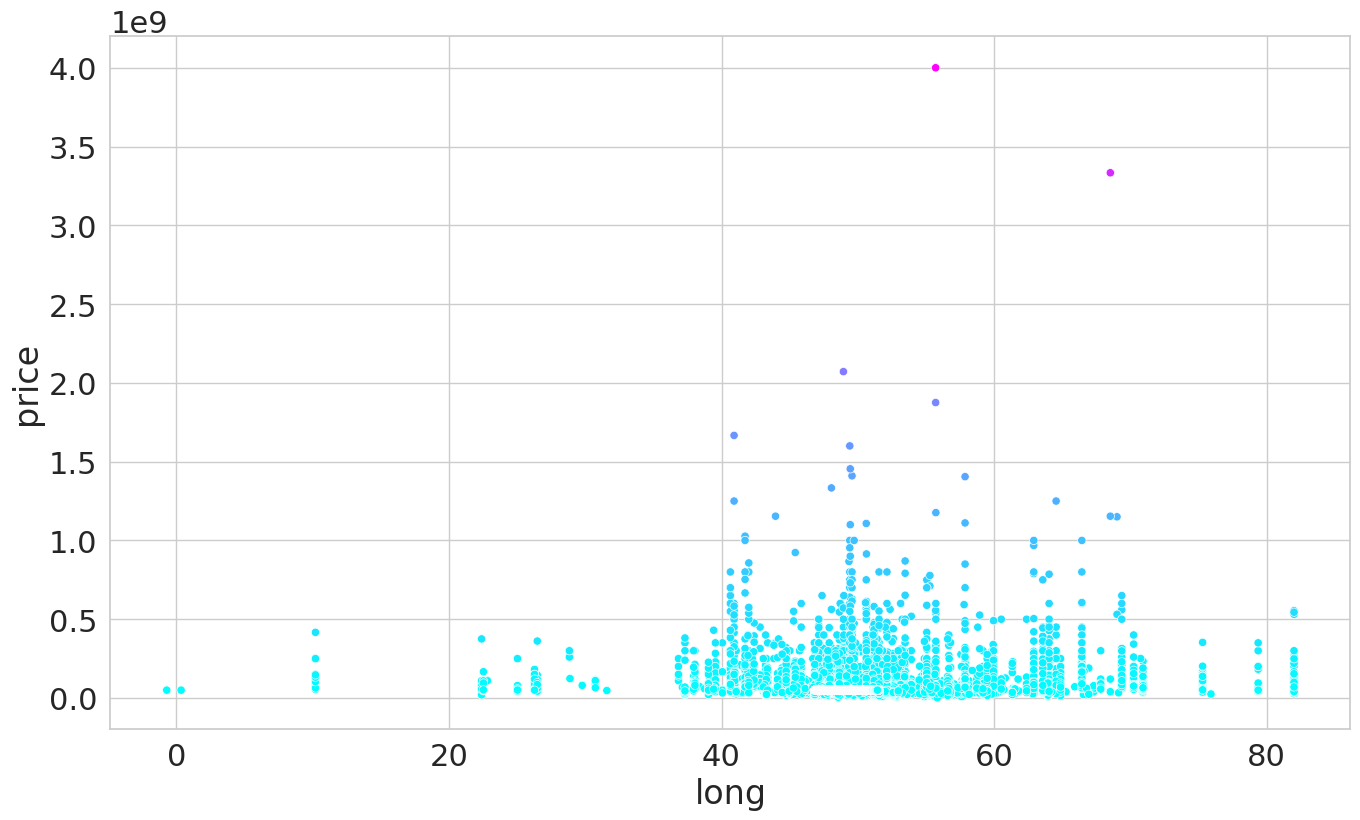

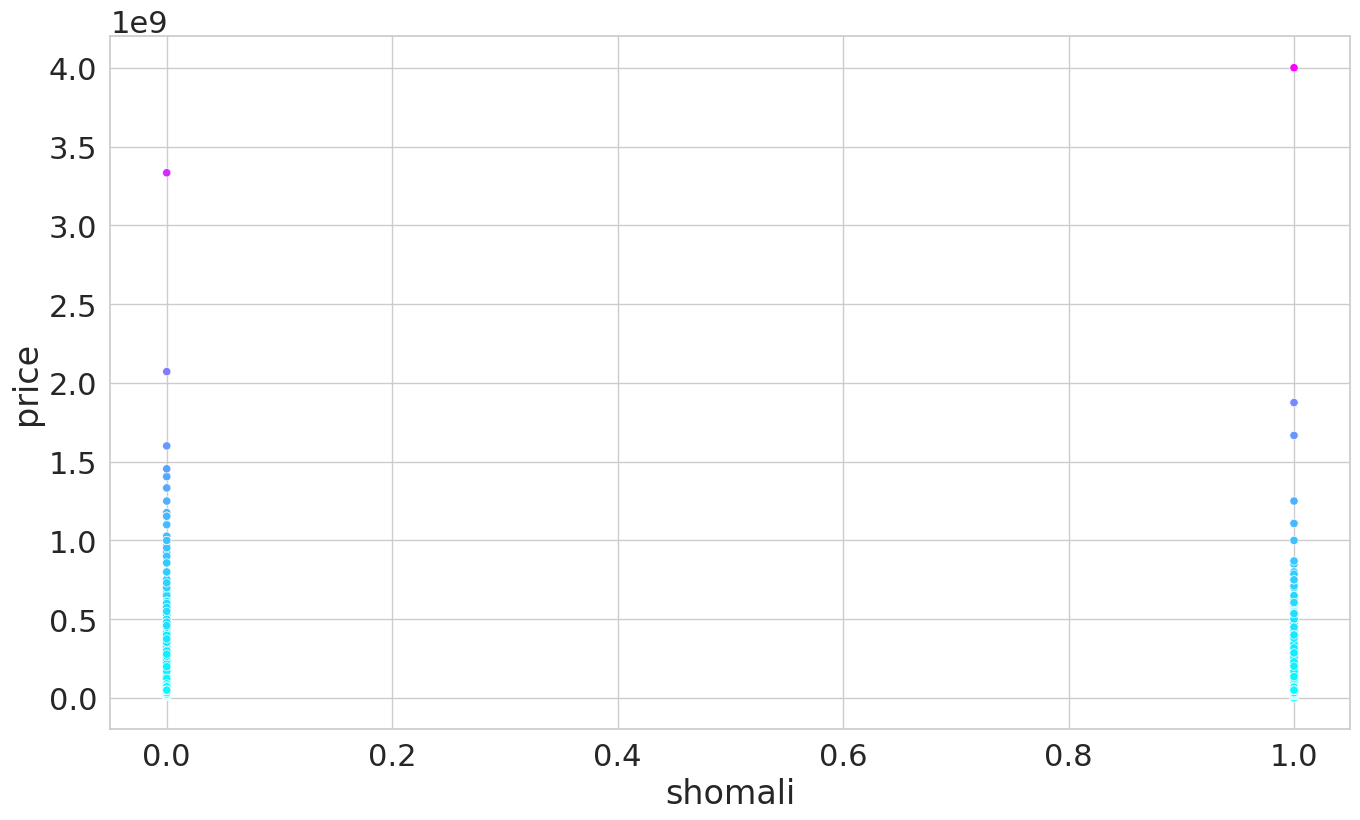

In [262]:
for feature in df.columns:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=df, x=feature,y='price',
                    hue='price', palette='cool', legend=False)
    plt.show()

## Splitting the dataset into the Training set and Test set

In [441]:
X = df.drop(['price'],axis=1)
y = df.filter(['price'],axis=1)

In [442]:
print(X)

         year  tabaghat  parking  anbari  metrag  asansor  room  floor  \
1      1391.0       5.0        1       0    80.0        1   2.0    3.0   
2      1387.0       4.0        0       1    62.0        0   2.0    4.0   
6      1401.0       5.0        1       1    87.0        1   2.0    1.0   
7      1385.0       4.0        0       1    55.0        0   2.0    3.0   
8      1393.0       4.0        1       0    63.0        1   2.0    2.0   
...       ...       ...      ...     ...     ...      ...   ...    ...   
20846  1387.0       5.0        1       1   105.0        1   2.0    4.0   
20847  1401.0       5.0        1       1   100.0        1   2.0    3.0   
20848  1394.0       5.0        1       1    82.0        1   2.0    2.0   
20852  1401.0       5.0        1       1    71.0        1   2.0    1.0   
20853  1386.0       5.0        1       1    95.0        1   2.0    2.0   

             lat  vahed       long  shomali  
1      31.177270    5.0  44.961240      0.0  
2      36.470180   

In [443]:
print(y)

            price
1      45625000.0
2      25000000.0
6      59770000.0
7      31818000.0
8      42857000.0
...           ...
20846  48600000.0
20847  75000000.0
20848  70700000.0
20852  77500000.0
20853  54200000.0

[5946 rows x 1 columns]


In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Feature Scaling

## Feature scaling with Pipeline

In [445]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Predicting the Test set results

In [446]:
y_predict= model.predict(X_test)

In [447]:
print("MSE (LinearRegression): ", metrics.mean_squared_error(y_test, y_predict))
print("R2_SCORE (LinearRegression): ", metrics.r2_score(y_test, y_predict))
print("MAPE (LinearRegression): ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["price"].mean()

MSE (LinearRegression):  140481867296814.62
R2_SCORE (LinearRegression):  0.42194352537338387
MAPE (LinearRegression):  0.17933915014849652


0.20709933687930127

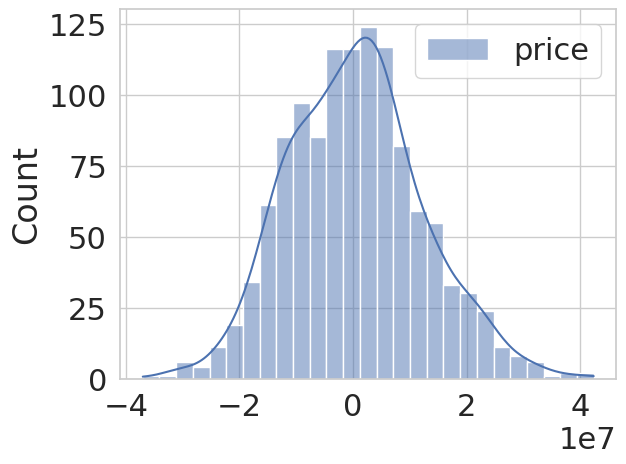

In [448]:
sns.histplot(y_test - y_predict, kde=True)
plt.show()

In [449]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=2, include_bias=False), 
              Ridge(alpha=10))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

print("MSE (Ridge + Polynomial): ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("R2_SCORE (Ridge + Polynomial): ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MAPE (Ridge + Polynomial): ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)) / df["price"].mean()

MSE (Ridge + Polynomial):  138479628283037.36
R2_SCORE (Ridge + Polynomial):  0.4301823625125468
MAPE (Ridge + Polynomial):  0.17155521613428376


0.20561818307099822

In [450]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)